In [67]:
import numpy as np
import pandas as pd
import wave
import math
import matplotlib.pyplot as plt

import config

from data import load_sample_data, load_event_data, downsample, get_time_interval
from data_merge import merge_samples_events
from data_transform import get_event_sequences

In [68]:

FILE_PATH = "../data/DoubleBlinkLR_Alex"

DOWNSAMPLE_RATE = 100

EVENT_LENGTH = 3 # length of a given event sequence in seconds

EVENT_START = -0.25
EVENT_END = 0.25


In [69]:
samples_df = load_sample_data(FILE_PATH)
samples_df = downsample(samples_df, n=DOWNSAMPLE_RATE)
events_df = load_event_data(FILE_PATH)

merge_df = merge_samples_events(samples_df, events_df, EVENT_START, EVENT_END)

# time_start = 30
# time_end = 60
# merge_df = get_time_interval(merge_df, time_start, time_end)
# print(merge_df)

seq_data, seq_labels = get_event_sequences(merge_df, event_length=EVENT_LENGTH)

print(seq_data.shape, seq_data)
print(seq_labels.shape, seq_labels)




Sample rate: 10000 samples/sec
Sample size: 2 bytes
No. channels: 1
Transforming data into individual sequences...
Transformed 18482 sequences of size 300
(18482, 300) [[ -105.98   129.44   -33.44 ...   176.29   155.79    61.92]
 [  129.44   -33.44   116.55 ...   155.79    61.92    76.39]
 [  -33.44   116.55  -125.85 ...    61.92    76.39    -7.94]
 ...
 [ -335.87   -44.54  -233.16 ... -2223.95 -1982.8  -1222.54]
 [  -44.54  -233.16   -38.21 ... -1982.8  -1222.54 -1108.52]
 [ -233.16   -38.21  -286.27 ... -1222.54 -1108.52  -457.56]]
(18482,) [-1 -1 -1 ... -1 -1 -1]


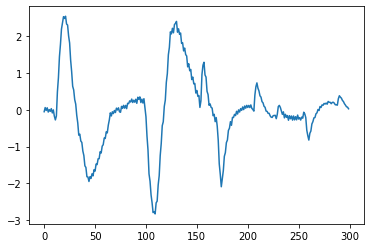

In [70]:
# Transform sequence data

for i in range(len(seq_data)):
    seq_data[i] /= seq_data[i].std()


plt.plot(seq_data[0])

[0 0 0 ... 0 0 0]
18482
0 14782 0.7998052158857266
1 1900 0.10280272697759983
2 1800 0.09739205713667352


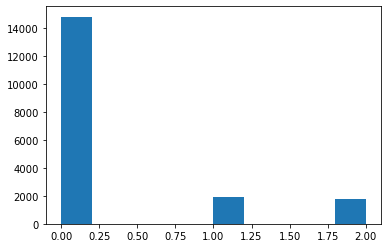

In [71]:
# Transform sequence labels

# 0 for None, 1 for Left, 2 for Right
seq_labels[seq_labels == -1] = 0
print(seq_labels)

plt.hist(seq_labels)

print(len(seq_labels))
print(0, sum(seq_labels == 0), sum(seq_labels == 0)/len(seq_labels))
print(1, sum(seq_labels == 1), sum(seq_labels == 1)/len(seq_labels))
print(2, sum(seq_labels == 2), sum(seq_labels == 2)/len(seq_labels))


In [111]:
# Randomly arrange data
# Be careful with this (best to test never-before-seen entire events rather than sequences)

train_n = round(len(seq_data)*0.7)
test_n = len(seq_data) - train_n
print(train_n, test_n)

train_seq, test_seq = seq_data[:train_n], seq_data[train_n:]
train_labels, test_labels = seq_labels[:train_n], seq_labels[train_n:]

print(train_seq.shape, train_labels.shape, train_labels)
print(test_seq.shape, test_labels.shape, test_labels)

# Print some labels examples
# for i in range(100, len(test_labels), 500):
#     print(i, test_labels[i])

12937 5545
(12937, 300) (12937,) [0 0 0 ... 0 0 0]
(5545, 300) (5545,) [0 0 0 ... 0 0 0]


In [98]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(300,)),
    tf.keras.layers.Dropout(.8, input_shape=(300,)),
    tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dropout(.2, input_shape=(16,)),
#     tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dropout(.2, input_shape=(16,)),
    tf.keras.layers.Dense(3)
])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 300)               0         
                                                                 
 dropout_14 (Dropout)        (None, 300)               0         
                                                                 
 dense_33 (Dense)            (None, 16)                4816      
                                                                 
 dense_34 (Dense)            (None, 3)                 51        
                                                                 
Total params: 4,867
Trainable params: 4,867
Non-trainable params: 0
_________________________________________________________________


In [124]:
import tensorflow as tf

# 85-86% after ~50 epochs
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(300,)),
    tf.keras.layers.Dropout(.9, input_shape=(300,)),
    
    tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dropout(.2, input_shape=(16,)),

    tf.keras.layers.Dense(16, activation='relu'),

    tf.keras.layers.Dense(3)
])

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 300)               0         
                                                                 
 dropout_20 (Dropout)        (None, 300)               0         
                                                                 
 dense_46 (Dense)            (None, 32)                9632      
                                                                 
 dense_47 (Dense)            (None, 16)                528       
                                                                 
 dense_48 (Dense)            (None, 3)                 51        
                                                                 
Total params: 10,211
Trainable params: 10,211
Non-trainable params: 0
_________________________________________________________________


In [130]:
import tensorflow as tf

# 1000 epochs 86-86% accuracy
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(300,)),
    tf.keras.layers.Dropout(.95, input_shape=(300,)),
    
    tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dropout(.2, input_shape=(16,)),

    tf.keras.layers.Dense(16, activation='relu'),

    tf.keras.layers.Dense(3)
])

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_21 (Flatten)        (None, 300)               0         
                                                                 
 dropout_22 (Dropout)        (None, 300)               0         
                                                                 
 dense_52 (Dense)            (None, 32)                9632      
                                                                 
 dense_53 (Dense)            (None, 16)                528       
                                                                 
 dense_54 (Dense)            (None, 3)                 51        
                                                                 
Total params: 10,211
Trainable params: 10,211
Non-trainable params: 0
_________________________________________________________________


In [131]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

EPOCHS = 1000

history = model.fit(
    train_seq,
    train_labels,
    epochs=EPOCHS,
    validation_data=(test_seq, test_labels)
#     batch_size=16
)

Epoch 1/1000
405/405 [==============================] - 1s 1ms/step - loss: 1.1477 - accuracy: 0.6994 - val_loss: 0.7532 - val_accuracy: 0.8061
Epoch 2/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.7141 - accuracy: 0.7782 - val_loss: 0.7119 - val_accuracy: 0.8099
Epoch 3/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.6578 - accuracy: 0.7927 - val_loss: 0.6853 - val_accuracy: 0.8150
Epoch 4/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.6273 - accuracy: 0.7981 - val_loss: 0.6349 - val_accuracy: 0.8132
Epoch 5/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.6218 - accuracy: 0.7964 - val_loss: 0.6131 - val_accuracy: 0.8108
Epoch 6/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.6066 - accuracy: 0.7973 - val_loss: 0.5804 - val_accuracy: 0.8112
Epoch 7/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.5999 - accuracy: 0.7970 - val_loss: 0.5788 - val_accuracy:

405/405 [==============================] - 0s 1ms/step - loss: 0.5170 - accuracy: 0.8096 - val_loss: 0.4475 - val_accuracy: 0.8301
Epoch 58/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.5137 - accuracy: 0.8086 - val_loss: 0.4422 - val_accuracy: 0.8296
Epoch 59/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.5094 - accuracy: 0.8123 - val_loss: 0.4432 - val_accuracy: 0.8323
Epoch 60/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.5084 - accuracy: 0.8097 - val_loss: 0.4358 - val_accuracy: 0.8330
Epoch 61/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.5040 - accuracy: 0.8160 - val_loss: 0.4355 - val_accuracy: 0.8390
Epoch 62/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.5132 - accuracy: 0.8092 - val_loss: 0.4329 - val_accuracy: 0.8377
Epoch 63/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.5122 - accuracy: 0.8092 - val_loss: 0.4355 - val_accuracy: 0.8240

405/405 [==============================] - 0s 1ms/step - loss: 0.4902 - accuracy: 0.8157 - val_loss: 0.4099 - val_accuracy: 0.8415
Epoch 114/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4941 - accuracy: 0.8140 - val_loss: 0.4279 - val_accuracy: 0.8417
Epoch 115/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4915 - accuracy: 0.8175 - val_loss: 0.4188 - val_accuracy: 0.8447
Epoch 116/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4955 - accuracy: 0.8135 - val_loss: 0.4179 - val_accuracy: 0.8480
Epoch 117/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4942 - accuracy: 0.8129 - val_loss: 0.4108 - val_accuracy: 0.8469
Epoch 118/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4888 - accuracy: 0.8196 - val_loss: 0.4239 - val_accuracy: 0.8435
Epoch 119/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4915 - accuracy: 0.8166 - val_loss: 0.4306 - val_accuracy: 

405/405 [==============================] - 0s 1ms/step - loss: 0.4831 - accuracy: 0.8207 - val_loss: 0.4080 - val_accuracy: 0.8424
Epoch 170/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4806 - accuracy: 0.8196 - val_loss: 0.4035 - val_accuracy: 0.8494
Epoch 171/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4861 - accuracy: 0.8143 - val_loss: 0.4079 - val_accuracy: 0.8451
Epoch 172/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4809 - accuracy: 0.8174 - val_loss: 0.4000 - val_accuracy: 0.8498
Epoch 173/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4784 - accuracy: 0.8180 - val_loss: 0.4097 - val_accuracy: 0.8536
Epoch 174/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4801 - accuracy: 0.8224 - val_loss: 0.4088 - val_accuracy: 0.8509
Epoch 175/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4824 - accuracy: 0.8170 - val_loss: 0.4035 - val_accuracy: 

405/405 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.8210 - val_loss: 0.3859 - val_accuracy: 0.8615
Epoch 226/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4805 - accuracy: 0.8187 - val_loss: 0.3998 - val_accuracy: 0.8539
Epoch 227/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4778 - accuracy: 0.8184 - val_loss: 0.3960 - val_accuracy: 0.8611
Epoch 228/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4720 - accuracy: 0.8201 - val_loss: 0.3970 - val_accuracy: 0.8514
Epoch 229/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4783 - accuracy: 0.8184 - val_loss: 0.3932 - val_accuracy: 0.8568
Epoch 230/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4803 - accuracy: 0.8169 - val_loss: 0.4058 - val_accuracy: 0.8577
Epoch 231/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4790 - accuracy: 0.8166 - val_loss: 0.3943 - val_accuracy: 

405/405 [==============================] - 0s 1ms/step - loss: 0.4686 - accuracy: 0.8207 - val_loss: 0.3862 - val_accuracy: 0.8597
Epoch 282/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4657 - accuracy: 0.8221 - val_loss: 0.3934 - val_accuracy: 0.8463
Epoch 283/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4744 - accuracy: 0.8199 - val_loss: 0.3896 - val_accuracy: 0.8528
Epoch 284/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4767 - accuracy: 0.8187 - val_loss: 0.3931 - val_accuracy: 0.8604
Epoch 285/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4655 - accuracy: 0.8250 - val_loss: 0.3945 - val_accuracy: 0.8510
Epoch 286/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4720 - accuracy: 0.8202 - val_loss: 0.3871 - val_accuracy: 0.8539
Epoch 287/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4703 - accuracy: 0.8214 - val_loss: 0.3910 - val_accuracy: 

405/405 [==============================] - 0s 1ms/step - loss: 0.4672 - accuracy: 0.8218 - val_loss: 0.3785 - val_accuracy: 0.8635
Epoch 338/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4664 - accuracy: 0.8241 - val_loss: 0.3828 - val_accuracy: 0.8559
Epoch 339/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4718 - accuracy: 0.8217 - val_loss: 0.3838 - val_accuracy: 0.8593
Epoch 340/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4633 - accuracy: 0.8252 - val_loss: 0.3989 - val_accuracy: 0.8537
Epoch 341/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4648 - accuracy: 0.8205 - val_loss: 0.4030 - val_accuracy: 0.8546
Epoch 342/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4697 - accuracy: 0.8187 - val_loss: 0.3864 - val_accuracy: 0.8608
Epoch 343/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4716 - accuracy: 0.8209 - val_loss: 0.3964 - val_accuracy: 

405/405 [==============================] - 0s 1ms/step - loss: 0.4664 - accuracy: 0.8250 - val_loss: 0.3842 - val_accuracy: 0.8705
Epoch 394/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4724 - accuracy: 0.8228 - val_loss: 0.3835 - val_accuracy: 0.8761
Epoch 395/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4682 - accuracy: 0.8211 - val_loss: 0.3882 - val_accuracy: 0.8644
Epoch 396/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4679 - accuracy: 0.8239 - val_loss: 0.3826 - val_accuracy: 0.8702
Epoch 397/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4672 - accuracy: 0.8250 - val_loss: 0.3804 - val_accuracy: 0.8678
Epoch 398/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4601 - accuracy: 0.8269 - val_loss: 0.3880 - val_accuracy: 0.8653
Epoch 399/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4694 - accuracy: 0.8211 - val_loss: 0.3813 - val_accuracy: 

405/405 [==============================] - 0s 1ms/step - loss: 0.4701 - accuracy: 0.8231 - val_loss: 0.3893 - val_accuracy: 0.8613
Epoch 450/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4619 - accuracy: 0.8258 - val_loss: 0.3698 - val_accuracy: 0.8700
Epoch 451/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4618 - accuracy: 0.8216 - val_loss: 0.3682 - val_accuracy: 0.8730
Epoch 452/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.8211 - val_loss: 0.3814 - val_accuracy: 0.8584
Epoch 453/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4621 - accuracy: 0.8265 - val_loss: 0.3756 - val_accuracy: 0.8720
Epoch 454/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4622 - accuracy: 0.8241 - val_loss: 0.3735 - val_accuracy: 0.8637
Epoch 455/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4656 - accuracy: 0.8236 - val_loss: 0.3745 - val_accuracy: 

405/405 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.8229 - val_loss: 0.3744 - val_accuracy: 0.8597
Epoch 506/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4643 - accuracy: 0.8238 - val_loss: 0.3718 - val_accuracy: 0.8628
Epoch 507/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4642 - accuracy: 0.8234 - val_loss: 0.3711 - val_accuracy: 0.8660
Epoch 508/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4644 - accuracy: 0.8181 - val_loss: 0.3801 - val_accuracy: 0.8718
Epoch 509/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4561 - accuracy: 0.8258 - val_loss: 0.3782 - val_accuracy: 0.8631
Epoch 510/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.8252 - val_loss: 0.3854 - val_accuracy: 0.8638
Epoch 511/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4608 - accuracy: 0.8241 - val_loss: 0.3797 - val_accuracy: 

405/405 [==============================] - 0s 1ms/step - loss: 0.4647 - accuracy: 0.8209 - val_loss: 0.3891 - val_accuracy: 0.8572
Epoch 562/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4643 - accuracy: 0.8218 - val_loss: 0.3731 - val_accuracy: 0.8738
Epoch 563/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4623 - accuracy: 0.8218 - val_loss: 0.3832 - val_accuracy: 0.8615
Epoch 564/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4640 - accuracy: 0.8241 - val_loss: 0.3879 - val_accuracy: 0.8541
Epoch 565/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4575 - accuracy: 0.8270 - val_loss: 0.3902 - val_accuracy: 0.8543
Epoch 566/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4672 - accuracy: 0.8235 - val_loss: 0.3793 - val_accuracy: 0.8642
Epoch 567/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4638 - accuracy: 0.8223 - val_loss: 0.3814 - val_accuracy: 

405/405 [==============================] - 0s 1ms/step - loss: 0.4586 - accuracy: 0.8224 - val_loss: 0.3798 - val_accuracy: 0.8647
Epoch 618/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4575 - accuracy: 0.8238 - val_loss: 0.3747 - val_accuracy: 0.8680
Epoch 619/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4642 - accuracy: 0.8218 - val_loss: 0.3741 - val_accuracy: 0.8696
Epoch 620/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4673 - accuracy: 0.8225 - val_loss: 0.3704 - val_accuracy: 0.8707
Epoch 621/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4603 - accuracy: 0.8281 - val_loss: 0.3784 - val_accuracy: 0.8700
Epoch 622/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4590 - accuracy: 0.8246 - val_loss: 0.3681 - val_accuracy: 0.8721
Epoch 623/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4644 - accuracy: 0.8275 - val_loss: 0.3740 - val_accuracy: 

405/405 [==============================] - 0s 1ms/step - loss: 0.4612 - accuracy: 0.8211 - val_loss: 0.3794 - val_accuracy: 0.8646
Epoch 674/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4607 - accuracy: 0.8268 - val_loss: 0.3656 - val_accuracy: 0.8628
Epoch 675/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4585 - accuracy: 0.8243 - val_loss: 0.3686 - val_accuracy: 0.8649
Epoch 676/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4572 - accuracy: 0.8223 - val_loss: 0.3617 - val_accuracy: 0.8734
Epoch 677/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4568 - accuracy: 0.8260 - val_loss: 0.3696 - val_accuracy: 0.8745
Epoch 678/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4568 - accuracy: 0.8241 - val_loss: 0.3664 - val_accuracy: 0.8707
Epoch 679/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4582 - accuracy: 0.8255 - val_loss: 0.3742 - val_accuracy: 

405/405 [==============================] - 0s 1ms/step - loss: 0.4513 - accuracy: 0.8299 - val_loss: 0.3688 - val_accuracy: 0.8629
Epoch 730/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4617 - accuracy: 0.8245 - val_loss: 0.3912 - val_accuracy: 0.8559
Epoch 731/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4541 - accuracy: 0.8241 - val_loss: 0.3734 - val_accuracy: 0.8649
Epoch 732/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4627 - accuracy: 0.8208 - val_loss: 0.3651 - val_accuracy: 0.8799
Epoch 733/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4541 - accuracy: 0.8254 - val_loss: 0.3751 - val_accuracy: 0.8606
Epoch 734/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.8251 - val_loss: 0.3748 - val_accuracy: 0.8718
Epoch 735/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4588 - accuracy: 0.8216 - val_loss: 0.3749 - val_accuracy: 

405/405 [==============================] - 0s 1ms/step - loss: 0.4589 - accuracy: 0.8222 - val_loss: 0.3861 - val_accuracy: 0.8536
Epoch 786/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4601 - accuracy: 0.8242 - val_loss: 0.3699 - val_accuracy: 0.8664
Epoch 787/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4554 - accuracy: 0.8235 - val_loss: 0.3743 - val_accuracy: 0.8714
Epoch 788/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4567 - accuracy: 0.8256 - val_loss: 0.3861 - val_accuracy: 0.8662
Epoch 789/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4639 - accuracy: 0.8236 - val_loss: 0.3744 - val_accuracy: 0.8707
Epoch 790/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4602 - accuracy: 0.8249 - val_loss: 0.3797 - val_accuracy: 0.8669
Epoch 791/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4612 - accuracy: 0.8246 - val_loss: 0.3757 - val_accuracy: 

405/405 [==============================] - 0s 1ms/step - loss: 0.4589 - accuracy: 0.8255 - val_loss: 0.3786 - val_accuracy: 0.8601
Epoch 842/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4550 - accuracy: 0.8257 - val_loss: 0.3861 - val_accuracy: 0.8581
Epoch 843/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4513 - accuracy: 0.8285 - val_loss: 0.3659 - val_accuracy: 0.8644
Epoch 844/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.4582 - accuracy: 0.8255 - val_loss: 0.3845 - val_accuracy: 0.8647
Epoch 845/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4541 - accuracy: 0.8254 - val_loss: 0.3672 - val_accuracy: 0.8720
Epoch 846/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4547 - accuracy: 0.8239 - val_loss: 0.3798 - val_accuracy: 0.8545
Epoch 847/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4585 - accuracy: 0.8235 - val_loss: 0.3670 - val_accuracy: 

405/405 [==============================] - 0s 1ms/step - loss: 0.4569 - accuracy: 0.8224 - val_loss: 0.3740 - val_accuracy: 0.8604
Epoch 898/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4600 - accuracy: 0.8247 - val_loss: 0.3782 - val_accuracy: 0.8676
Epoch 899/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4579 - accuracy: 0.8265 - val_loss: 0.3786 - val_accuracy: 0.8703
Epoch 900/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4510 - accuracy: 0.8275 - val_loss: 0.3723 - val_accuracy: 0.8676
Epoch 901/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4536 - accuracy: 0.8242 - val_loss: 0.3756 - val_accuracy: 0.8757
Epoch 902/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4522 - accuracy: 0.8266 - val_loss: 0.3696 - val_accuracy: 0.8691
Epoch 903/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4598 - accuracy: 0.8210 - val_loss: 0.3793 - val_accuracy: 

405/405 [==============================] - 0s 1ms/step - loss: 0.4537 - accuracy: 0.8243 - val_loss: 0.3782 - val_accuracy: 0.8687
Epoch 954/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4521 - accuracy: 0.8288 - val_loss: 0.3722 - val_accuracy: 0.8626
Epoch 955/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4564 - accuracy: 0.8232 - val_loss: 0.3708 - val_accuracy: 0.8608
Epoch 956/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4511 - accuracy: 0.8287 - val_loss: 0.3740 - val_accuracy: 0.8631
Epoch 957/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4590 - accuracy: 0.8249 - val_loss: 0.3754 - val_accuracy: 0.8637
Epoch 958/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4557 - accuracy: 0.8275 - val_loss: 0.3919 - val_accuracy: 0.8500
Epoch 959/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 0.8281 - val_loss: 0.3689 - val_accuracy: 

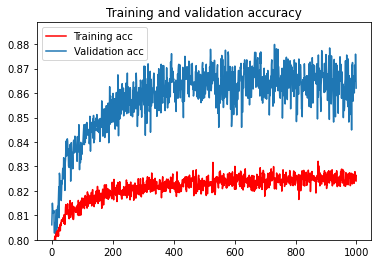

In [132]:
plt.plot(history.history['accuracy'], label='Training acc', color="red")
plt.plot(history.history['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylim(0.8)
plt.legend()

In [134]:
test_loss, test_acc = model.evaluate(
    test_seq,
    test_labels,
    verbose=2
)

print('\nTest accuracy:', test_acc)

174/174 - 0s - loss: 0.3773 - accuracy: 0.8620 - 118ms/epoch - 681us/step

Test accuracy: 0.8620378971099854


In [135]:
# class_names = ["None", "Left", "Right"]

predictions = model.predict(test_seq)
# print(predictions)

event_pred = np.argmax(tf.nn.softmax(predictions, axis=1), axis=1)
# print(event_pred)

# Rows are "real" labels
# Columns are "predicted" labels
tf.math.confusion_matrix(
    test_labels,
    event_pred
)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[4220,   86,  139],
       [ 279,  271,    0],
       [ 261,    0,  289]], dtype=int32)>

In [ ]:
# Plot the predictions against the actual values
































